<a href="https://colab.research.google.com/github/orsan123/Gold-Price-Prediction-Model/blob/main/greenfuture_analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE DATASET AND APPLYING THE BASIC FUNCTIONS TO THE DATAFRAME**


In [ ]:
import pandas as pd
import sqlite3

url = 'https://raw.githubusercontent.com/orsan123/Database-and-analytics/refs/heads/main/greenfuture_ideas_dataset.csv'
df = pd.read_csv(url)

#diplaying the first few rows
df.head()


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag
0,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
1,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
2,fa012fe7,France,Environmental Policy,10/1/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
3,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
4,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


In [ ]:
# Create in-memory SQL DB
conn = sqlite3.connect(':memory:')
df.to_sql('ideas', conn, index=False, if_exists='replace')

3000

In [ ]:
pd.read_sql("SELECT * FROM ideas LIMIT 5;", conn)


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag
0,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
1,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
2,fa012fe7,France,Environmental Policy,10/1/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
3,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
4,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


In [ ]:
# Check if the EmployeeID already exists
cursor = conn.cursor()
cursor.execute("SELECT 1 FROM ideas WHERE EmployeeID = 'or123'")
exists = cursor.fetchone()

# only inserting the value if it doesn't exist already
if not exists:
    conn.execute("INSERT INTO ideas ('EmployeeID', 'OfficeLocation', 'Department', 'IdeaSubmissionDate', 'IdeaTitle', 'IdeaCategory', 'NumberOfVotes', 'CollaborationStatus', 'ApprovalStatus', 'ImplementationStatus', 'SecurityConcernFlag') VALUES ('or123', 'UAE', 'Energy', '2025-05-19', 'Idea 3001', 'Renewable Energy', 20, 'Cross-Regional Team', 'Pending', 'Not Started', 'No');")

In [ ]:
pd.read_sql("SELECT * from ideas WHERE EmployeeID = 'or123';", conn)


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag
0,or123,UAE,Energy,2025-05-19,Idea 3001,Renewable Energy,20,Cross-Regional Team,Pending,Not Started,No


In [ ]:
conn.execute("UPDATE ideas SET ApprovalStatus = 'Approved' WHERE EmployeeID = 'or123';")
pd.read_sql("SELECT * from ideas WHERE EmployeeID = 'or123';", conn)


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag
0,or123,UAE,Energy,2025-05-19,Idea 3001,Renewable Energy,20,Cross-Regional Team,Approved,Not Started,No


In [ ]:
conn.execute("DELETE FROM ideas WHERE EmployeeID = 'or123';")
pd.read_sql("SELECT * from ideas WHERE EmployeeID = 'or123';", conn)


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag


## **Applying aggregate functions**

In [ ]:
query = """
SELECT OfficeLocation, COUNT(*) AS total_ideas
       FROM ideas
       GROUP BY OfficeLocation
       ORDER BY total_ideas DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

   OfficeLocation  total_ideas
0           China          280
1          France          266
2    South Africa          260
3           Japan          259
4              UK          257
5         Germany          252
6          Canada          252
7       Australia          244
8             USA          241
9          Mexico          240
10         Brazil          227
11          India          222


In [ ]:
query = """
SELECT Department, AVG([NumberofVotes]) AS avg_votes
       FROM ideas
       GROUP BY Department
       ORDER BY avg_votes DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

             Department   avg_votes
0  Environmental Policy  252.925852
1     Urban Development  250.755144
2              Research  248.580321
3            Technology  248.045952
4      Renewable Energy  246.631579
5        Infrastructure  243.689214


In [ ]:
query = """
SELECT OfficeLocation,
              COUNT(*) AS total_submissions,
              SUM(CASE WHEN CollaborationStatus = 'Cross-Regional Team' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS CollaborationRate
       FROM ideas
       GROUP BY OfficeLocation
       ORDER BY CollaborationRate DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

   OfficeLocation  total_submissions  CollaborationRate
0          Canada                252          52.380952
1           Japan                259          52.123552
2             USA                241          51.452282
3         Germany                252          50.396825
4           China                280          50.000000
5              UK                257          47.859922
6          France                266          47.744361
7          Brazil                227          47.577093
8       Australia                244          46.721311
9    South Africa                260          46.538462
10         Mexico                240          46.250000
11          India                222          41.891892


In [ ]:
query = """
SELECT SecurityConcernFlag,
       COUNT(*) AS total_ideas,
       SUM(CASE WHEN ApprovalStatus = 'Approved' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS approval_rate
FROM ideas
GROUP BY SecurityConcernFlag;
"""

result = pd.read_sql_query(query, conn)
print(result)

  SecurityConcernFlag  total_ideas  approval_rate
0                  No         2733      34.833516
1                 Yes          267      31.835206


## **INNOVATION ANALYSIS AND OPTIMIZATION**

In [ ]:
install.packages("sqldf")
library(sqldf)
install.packages("dplyr")
library(dplyr)
df <- read.csv("https://raw.githubusercontent.com/orsan123/Database-and-analytics/refs/heads/main/greenfuture_ideas_dataset.csv")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
sqldf("SELECT OfficeLocation, COUNT(*) AS TotalSubmissions
       FROM df
       GROUP BY OfficeLocation
       ORDER BY TotalSubmissions DESC")


OfficeLocation,TotalSubmissions
<chr>,<int>
China,280
France,266
South Africa,260
Japan,259
UK,257
Germany,252
Canada,252
Australia,244
USA,241


In [ ]:
sqldf("SELECT COUNT(*) AS PendingImplementations
       FROM df
       WHERE ApprovalStatus = 'Approved' AND ImplementationStatus != 'Implemented'")


PendingImplementations
<int>
1037


In [ ]:
sqldf("SELECT SecurityConcernFlag,
              COUNT(*) AS TotalIdeas,
              SUM(CASE WHEN ApprovalStatus = 'Approved' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS ApprovalRate
       FROM df
       GROUP BY SecurityConcernFlag")


SecurityConcernFlag,TotalIdeas,ApprovalRate
<chr>,<int>,<dbl>
No,2733,34.83352
Yes,267,31.83521


In [ ]:
sqldf("SELECT OfficeLocation,
              COUNT(*) AS TotalIdeas,
              SUM(CASE WHEN CollaborationStatus = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS CollaborationRate
       FROM df
       GROUP BY OfficeLocation
       ORDER BY CollaborationRate DESC")


OfficeLocation,TotalIdeas,CollaborationRate
<chr>,<int>,<dbl>
USA,241,0
UK,257,0
South Africa,260,0
Mexico,240,0
Japan,259,0
India,222,0
Germany,252,0
France,266,0
China,280,0


In [ ]:
sqldf("SELECT Department, AVG(NumberofVotes) AS AverageVotes
       FROM df
       GROUP BY Department
       ORDER BY AverageVotes DESC")


Department,AverageVotes
<chr>,<dbl>
Environmental Policy,252.9259
Urban Development,250.7551
Research,248.5803
Technology,248.0460
Renewable Energy,246.6316
Infrastructure,243.6892


## **DATA** **MANIPULATION** **AND** **TRANSFORMATION**

In [ ]:
df_duplicated <- df

names(df)  #to confirm the column names

[1] "EmployeeID"           "OfficeLocation"       "Department"          
 [4] "IdeaSubmissionDate"   "IdeaTitle"            "IdeaCategory"        
 [7] "NumberofVotes"        "CollaborationStatus"  "ApprovalStatus"      
[10] "ImplementationStatus" "SecurityConcernFlag"

In [ ]:
#distributing the ideas into three categories and checking how many ideas are there in each category

df <- read.csv("https://raw.githubusercontent.com/orsan123/Database-and-analytics/refs/heads/main/greenfuture_ideas_dataset.csv")

df_duplicated <- df %>%
  mutate(VoteScore = case_when(
    NumberofVotes >= 200 ~ "High",
    NumberofVotes >= 100 ~ "Medium",
    TRUE ~ "Low"
  ))

df_duplicated %>%
select(IdeaTitle, NumberofVotes, VoteScore)%>%
group_by(VoteScore) %>%
summarise(Total = n())

VoteScore,Total
<chr>,<int>
High,1790
Low,603
Medium,607


In [ ]:
#Gives strategic insight into which departments are most successful in innovation approvals.
df <- read.csv("https://raw.githubusercontent.com/orsan123/Database-and-analytics/refs/heads/main/greenfuture_ideas_dataset.csv")

df %>%
  group_by(Department) %>%
  summarise(TotalIdeas = n(),
            Approved = sum(ApprovalStatus == "Approved"),
            ApprovalRate = (Approved / TotalIdeas) * 100) %>%
  filter(ApprovalRate >= 30)



Department,TotalIdeas,Approved,ApprovalRate
<chr>,<int>,<int>,<dbl>
Environmental Policy,499,169,33.86774
Infrastructure,547,183,33.45521
Renewable Energy,513,182,35.47758
Research,498,169,33.93574
Technology,457,172,37.63676
Urban Development,486,162,33.33333


In [ ]:
#Handy for filtering ideas in "Approved - NotImplemented" state to focus on execution delays.
df <- df %>%
  mutate(IdeaStage = paste(ApprovalStatus, "-", ImplementationStatus))

#checking which ideas were approved but is still getting delayed

df %>%
  filter(IdeaStage == "Approved - Not Started")


EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag,IdeaStage
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
fa012fe7,France,Environmental Policy,10/1/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Approved - Not Started
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,Approved - Not Started
29971bc8,Canada,Urban Development,31/05/2023,Idea 22,Sustainable Transport,467,Cross-Regional Team,Approved,Not Started,No,Approved - Not Started
4a039704,Australia,Renewable Energy,24/01/2024,Idea 24,Sustainable Transport,302,Single Contributor,Approved,Not Started,No,Approved - Not Started
c217bb2d,USA,Infrastructure,29/04/2023,Idea 41,Renewable Energy,226,Cross-Regional Team,Approved,Not Started,No,Approved - Not Started
450dfb3c,Mexico,Urban Development,5/3/2025,Idea 57,Water Management,35,Cross-Regional Team,Approved,Not Started,Yes,Approved - Not Started
5bc62b5d,China,Environmental Policy,26/09/2024,Idea 66,Carbon Capture,118,Single Contributor,Approved,Not Started,No,Approved - Not Started
0a7efb59,Brazil,Technology,3/9/2023,Idea 73,Carbon Capture,393,Cross-Regional Team,Approved,Not Started,No,Approved - Not Started
f220f919,Mexico,Infrastructure,20/09/2024,Idea 80,Sustainable Transport,428,Single Contributor,Approved,Not Started,No,Approved - Not Started


In [ ]:
#this shows which departments are coming up with the most risky ideas

df %>%
  group_by(Department) %>%
  summarise(Total = n(),
            WithSecurityConcern = sum(SecurityConcernFlag == "Yes"),
            ConcernRate = (WithSecurityConcern / Total) * 100) %>%
  arrange(desc(ConcernRate))


Department,Total,WithSecurityConcern,ConcernRate
<chr>,<int>,<int>,<dbl>
Research,498,52,10.441767
Environmental Policy,499,46,9.218437
Renewable Energy,513,44,8.576998
Technology,457,39,8.533917
Infrastructure,547,46,8.409506
Urban Development,486,40,8.230453


In [ ]:
#Good for identifying potentially risky but valuable ideas that made it through.


df %>%
  filter(SecurityConcernFlag == "Yes", ApprovalStatus == "Approved") %>%
  select(EmployeeID, IdeaTitle, Department, NumberofVotes)


EmployeeID,IdeaTitle,Department,NumberofVotes
<chr>,<chr>,<chr>,<int>
fa012fe7,Idea 3,Environmental Policy,48
4aa3ec97,Idea 47,Environmental Policy,41
b86d3b55,Idea 52,Renewable Energy,27
450dfb3c,Idea 57,Urban Development,35
c5881e3a,Idea 107,Technology,193
85a2c2a6,Idea 287,Infrastructure,345
301ba7df,Idea 296,Urban Development,215
62c03dec,Idea 319,Technology,258
3b8d4127,Idea 352,Research,316


In [ ]:
#Evaluates whether collaboration boosts idea quality or approval chances.

df %>%
  group_by(CollaborationStatus) %>%
  summarise(AvgVotes = mean(NumberofVotes, na.rm = TRUE),
            ApprovalRate = mean(ApprovalStatus == "Approved") * 100)


CollaborationStatus,AvgVotes,ApprovalRate
<chr>,<dbl>,<dbl>
Cross-Regional Team,249.1416,33.74570
Single Contributor,247.6026,35.33981


## **DATA VISUALISATION**

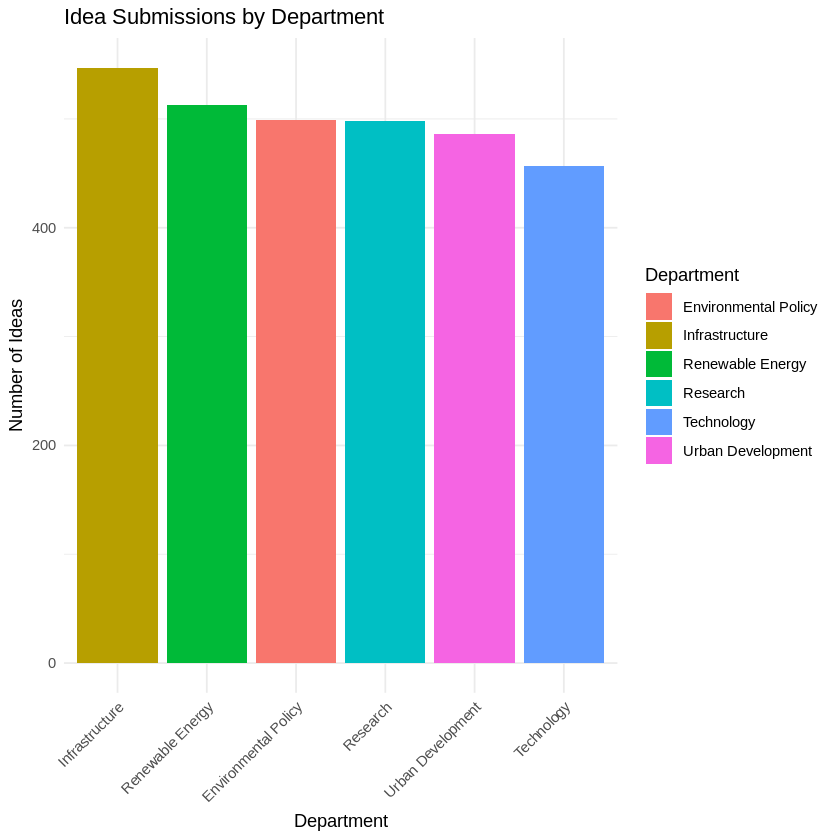

In [ ]:
#to identify the most/least innovative departments.
#this bar plot assesses if innovation is evenly distributed or concentrated.

library(ggplot2)

# Count ideas by department
department_counts <- df %>%
  count(Department, name = "IdeaCount")

# Create bar plot
ggplot(department_counts, aes(x = reorder(Department, -IdeaCount), y = IdeaCount, fill = Department)) +
  geom_bar(stat = "identity") +
  labs(title = "Idea Submissions by Department",
       x = "Department",
       y = "Number of Ideas") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



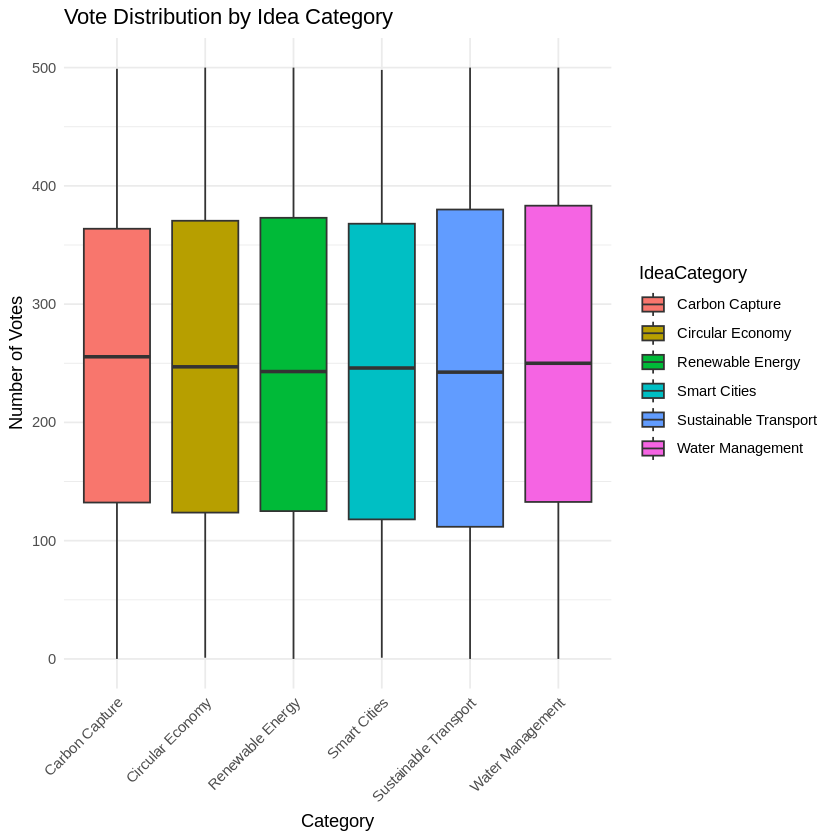

In [ ]:
#this shows which idea categories get the most votes
#this helps prioritize high-impact innovation areas.

ggplot(df, aes(x = IdeaCategory, y = NumberofVotes, fill = IdeaCategory)) +
  geom_boxplot() +
  labs(title = "Vote Distribution by Idea Category",
       x = "Category",
       y = "Number of Votes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

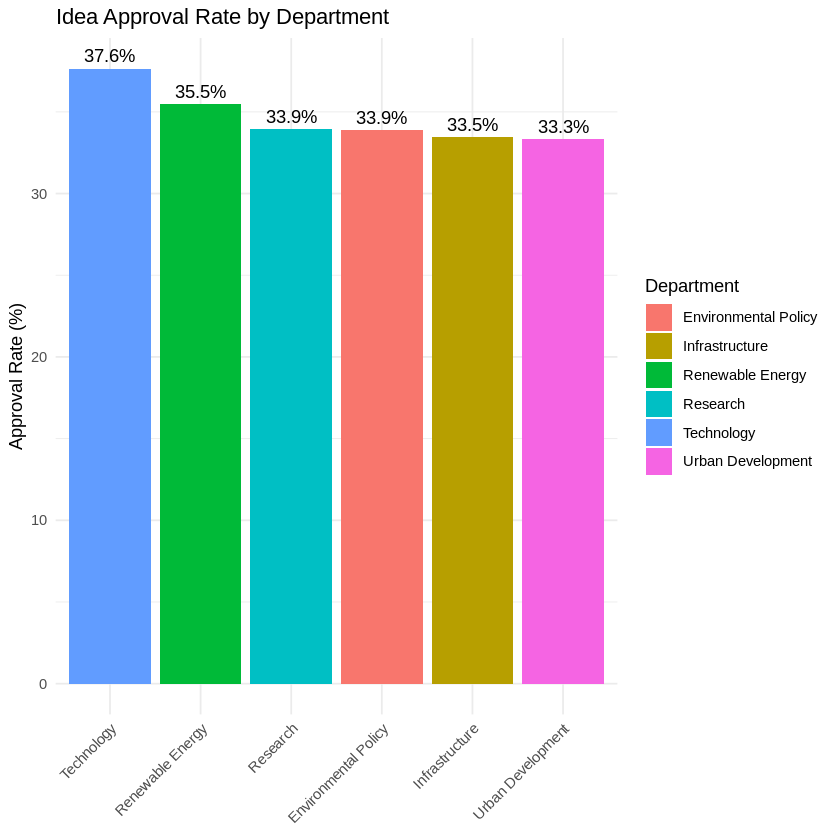

In [ ]:
#this shows the departments that gets the highest approval for their ideas.

library(ggplot2)

# Calculate approval rates
approval_data <- df %>%
  group_by(Department) %>%
  summarise(
    ApprovalRate = mean(ApprovalStatus == "Approved", na.rm = TRUE) * 100
  )

# Create plot
ggplot(approval_data, aes(x = reorder(Department, -ApprovalRate),
                         y = ApprovalRate,
                         fill = Department)) +
  geom_col() +
  geom_text(aes(label = paste0(round(ApprovalRate, 1), "%")),
            vjust = -0.5) +
  labs(
    title = "Idea Approval Rate by Department",
    x = NULL,
    y = "Approval Rate (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))